### 🧠 **Описание работы алгоритма (перцептрон)**

В этом коде реализован **простой алгоритм линейной классификации — перцептрон**.
Он пытается найти такую прямую (или гиперплоскость), которая разделяет два класса точек — с метками `+1` и `-1`.

---

### 🔹 1. Подготовка данных

```python
x_train = np.array([...])  # координаты точек (обучающая выборка)
y_train = np.array([...])  # метки классов: +1 или -1
```

Каждая строка `x_train` — это вектор признаков точки (например, ширина и длина).
`y_train` указывает, к какому классу принадлежит точка.

---

### 🔹 2. Инициализация параметров

```python
w = np.array([0.8, 0.9])  # веса (вектор нормали)
b = -10                   # смещение (bias)
```

* `w` задаёт направление и ориентацию разделяющей прямой.
* `b` — отвечает за её положение (сдвиг вверх/вниз).

---

### 🔹 3. Правило классификации

Для каждой точки вычисляется **активация**:
[
a(x) = w^T x + b
]

* Если `a(x) > 0`, модель относит точку к классу `+1`.
* Если `a(x) < 0` — к классу `-1`.

---

### 🔹 4. Обновление весов

Во время обучения (цикла по всем точкам):

```python
if y_i * a(x_i) <= 0:
    w += η * y_i * x_i
    b += η * y_i
```

Если точка классифицирована **неверно**, веса `w` и смещение `b` **корректируются** — прямая немного поворачивается или сдвигается, чтобы точка оказалась по правильную сторону.

* `η` — **скорость обучения** (learning rate)
* Коррекция идёт **в направлении метки `y_i`**

---

### 🔹 5. Условие останова

```python
if errors == 0:
    break
```

Если за проход по всем точкам не было ошибок классификации, обучение завершается — значит, прямая нашла корректное разделение.

---

### 🔹 6. Визуализация

На графике отображаются:

* Красные и синие точки (`y = 1` и `y = -1`)
* Зелёная разделяющая линия
* Фиолетовый **вектор нормали `w`**, который перпендикулярен линии и указывает, в какую сторону модель классифицирует как `+1`.

---

### 💬 Интуиция

Перцептрон постепенно подстраивает плоскость так, чтобы:

* точки класса `+1` оказались по одну сторону линии ( w^T x + b = 0 ),
* а точки `-1` — по другую.

Вектор `w` всегда **смотрит в сторону класса +1**.

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Данные (точки и метки)
x_train = np.array([
    [10, 50], [20, 30], [25, 30], [20, 60],
    [15, 70], [40, 40], [30, 45], [20, 45],
    [40, 30], [7, 35]
])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Параметры
N = 100              # количество итераций
η = 0.1              # шаг обучения (learning rate)
w = np.zeros(2)      # начальные веса
b = 0.0              # смещение (bias)


In [74]:
for _ in range(N):
    errors = 0
    for x_i, y_i in zip(x_train, y_train):
        a = w @ x_i + b
        # Ошибка классификации → обновление весов
        if y_i * a <= 0:             # если ошибка
            w += η * y_i * x_i       # обновляем веса
            b += η * y_i             # обновляем смещение
            errors += 1
    if errors == 0:
        break

print("Итоговые веса:", w)
print("Смещение:", b)

Итоговые веса: [ 9.5 -4.5]
Смещение: 0.1


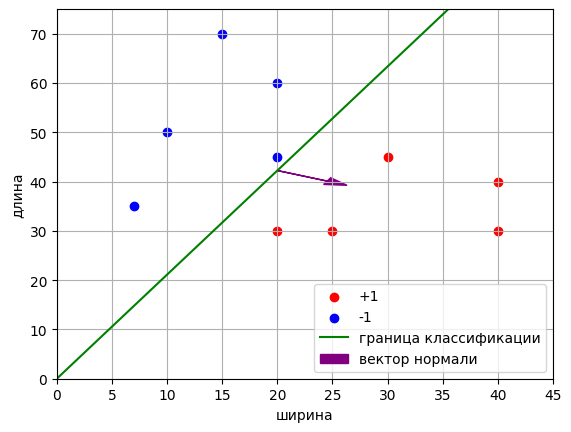

In [75]:
# Визуализация
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label='+1')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label='-1')

x_line = np.linspace(0, 45, 100)
y_line = -(w[0] * x_line + b) / w[1]
plt.plot(x_line, y_line, color='green', label='граница классификации')
# Берём точку на линии (середину для красоты)
x0 = 20
y0 = -(w[0]*x0 + b)/w[1]

# Нормализуем вектор, чтобы стрелка не была слишком длинной
w_norm = w / np.sqrt((w.T @ w))

# Рисуем стрелку нормали
plt.arrow(x0, y0, w_norm[0]*5, w_norm[1]*5,
          head_width=1.5, head_length=2, color='purple', label='вектор нормали')

plt.xlim(0, 45)
plt.ylim(0, 75)
plt.xlabel("ширина")
plt.ylabel("длина")
plt.grid(True)
plt.legend()
plt.show()